# Project 01 - Write a Data Science Blog Post

## Part 2: Data Analysis

### Data
 - NBA 2018-2019 Player Box Scores 
 - NBA 2018-2019 Daily Fantasy Scores (DFS)
 
### Business Questions
1. What are the key drivers for top fantasy scores?
2. What effect, if any, does seasonality play during the NBA season? 
3. Which positions are the most valuable from a fantasy score perspective? 

### Import Packages

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

# Use FiveThirtyEight's style of graphs
style.use('fivethirtyeight')

# Use 2 decimal places in output display
pd.set_option("display.precision", 1)

In [2]:
os.chdir('../lib')

In [3]:
from helpers import min_games_filter

### Import Data

In [4]:
os.chdir('../data')

In [5]:
df = pd.read_csv("Cleaned_NBA1819_PlayerStats-DFS.csv")

# Dropping unncessary columns
del_cols = ['Unnamed: 0', 'MIN']

df.drop(del_cols, axis=1, inplace=True)
df.head()

,DATASET,GAME-ID,DATE,PLAYER-ID,PLAYER,OWNTEAM,OPPONENTTEAM,STARTER (Y/N),VENUE (R/H),MINUTES,...,A,PF,ST,TO,BL,PTS,POSITION,DRAFTKINGS_CLASSIC_SALARY,FANDUEL_FULLROSTER_SALARY,YAHOO_FULLSLATE_SALARY
0,NBA 2018-2019 Regular Season,21800001,2018-10-16,203967,Dario Saric,Philadelphia,Boston,Y,R,22.9,...,1,5,0,3,0,6,PF,5500.0,6400.0,25.0
1,NBA 2018-2019 Regular Season,21800001,2018-10-16,203496,Robert Covington,Philadelphia,Boston,Y,R,34.2,...,0,1,2,2,1,8,SF,4700.0,6500.0,23.0
2,NBA 2018-2019 Regular Season,21800001,2018-10-16,203954,Joel Embiid,Philadelphia,Boston,Y,R,36.8,...,2,3,1,5,2,23,C,8800.0,10400.0,41.0
3,NBA 2018-2019 Regular Season,21800001,2018-10-16,1628365,Markelle Fultz,Philadelphia,Boston,Y,R,24.3,...,2,1,1,3,0,5,PG,5000.0,5700.0,16.0
4,NBA 2018-2019 Regular Season,21800001,2018-10-16,1627732,Ben Simmons,Philadelphia,Boston,Y,R,42.7,...,8,5,4,3,2,19,PG,8400.0,10000.0,46.0


In [6]:
df.shape

(27855, 34)

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27855 entries, 0 to 27854
Data columns (total 34 columns):
DATASET                      27855 non-null object
GAME-ID                      27855 non-null int64
DATE                         27855 non-null object
PLAYER-ID                    27855 non-null int64
PLAYER                       27855 non-null object
OWNTEAM                      27855 non-null object
OPPONENTTEAM                 27855 non-null object
STARTER (Y/N)                27855 non-null object
VENUE (R/H)                  27855 non-null object
MINUTES                      27855 non-null float64
USAGE RATE                   27855 non-null float64
DAYSREST                     27855 non-null int64
DRAFTKINGS_FANTASYPOINTS     27855 non-null float64
FANDUEL_FANTASYPOINTS        27855 non-null float64
YAHOO_FANTASYPOINTS          27855 non-null float64
FG                           27855 non-null int64
FGA                          27855 non-null int64
3P                      

### Data Cleaning

In [8]:
# Add additional date columns for analysis
df['DATE'] = pd.to_datetime(df['DATE'])
df['DATE_Month'] = pd.DatetimeIndex(df['DATE']).month_name()

# Re-order the Months based on the NBA season
df['DATE_Month'] = df['DATE_Month'].replace({'October':'NBA1819-01_October',
                                             'November':'NBA1819-02_November',
                                             'December':'NBA1819-03_December',
                                             'January':'NBA1819-04_January',
                                             'February':'NBA1819-05_February',
                                             'March':'NBA1819-06_March',
                                             'April':'NBA1819-07_April',
                                             'May':'NBA1819-08_May',
                                             'June':'NBA1819-09_June'})

# Create the percentage columns to better understand game performance
df['FG%'] = df['FG'] / df['FGA']
df['3P%'] = df['3P'] / df['3PA']
df['FT%'] = df['FT'] / df['FTA']

In [9]:
df['POSITION'].value_counts()

SG         5817
PG         5736
C          5466
PF         5421
SF         5190
G            99
F            66
G-F          28
F-C          24
Unknown       8
Name: POSITION, dtype: int64

In [10]:
# Institute a minimum games played to reduce noise
# df = min_games_filter(df, games_played=40)

# Create a filter to look at main positions and regular season games (no playoffs since fantasy season ends before playoffs start)
starter_mask = (df['DATASET'] == 'NBA 2018-2019 Regular Season') & ((df['POSITION'] == 'PG') | \
                (df['POSITION'] == 'SG') | (df['POSITION'] == 'SF') | (df['POSITION'] == 'PF') | \
                    (df['POSITION'] == 'C'))

### Exploratory Data Analysis

In [11]:
# Season trends for positions and their respective average fantasy score values
pd.pivot_table(df[starter_mask], index=['POSITION'],
                                      values=['YAHOO_FANTASYPOINTS'], 
                                      columns=['DATE_Month'], 
                                      aggfunc='mean')

YAHOO_FANTASYPOINTS                                          \
DATE_Month  NBA1819-01_October NBA1819-02_November NBA1819-03_December   
POSITION                                                                 
C                         23.8                23.7                23.9   
PF                        21.0                20.9                21.1   
PG                        21.5                21.9                22.2   
SF                        20.3                20.1                20.6   
SG                        18.4                18.8                19.0   

                                                                    \
DATE_Month NBA1819-04_January NBA1819-05_February NBA1819-06_March   
POSITION                                                             
C                        24.6                25.1             24.8   
PF                       20.2                20.6             20.0   
PG                       22.4                23.9             23.9   
SF                       19.2                19.9             18.3   
SG                       20.2                20.3             20.4   

                             
DATE_Month NBA1819-07_April  
POSITION                     
C                      25.5  
PF                     20.1  
PG                     24.2  
SF                     19.1  
SG                     20.9

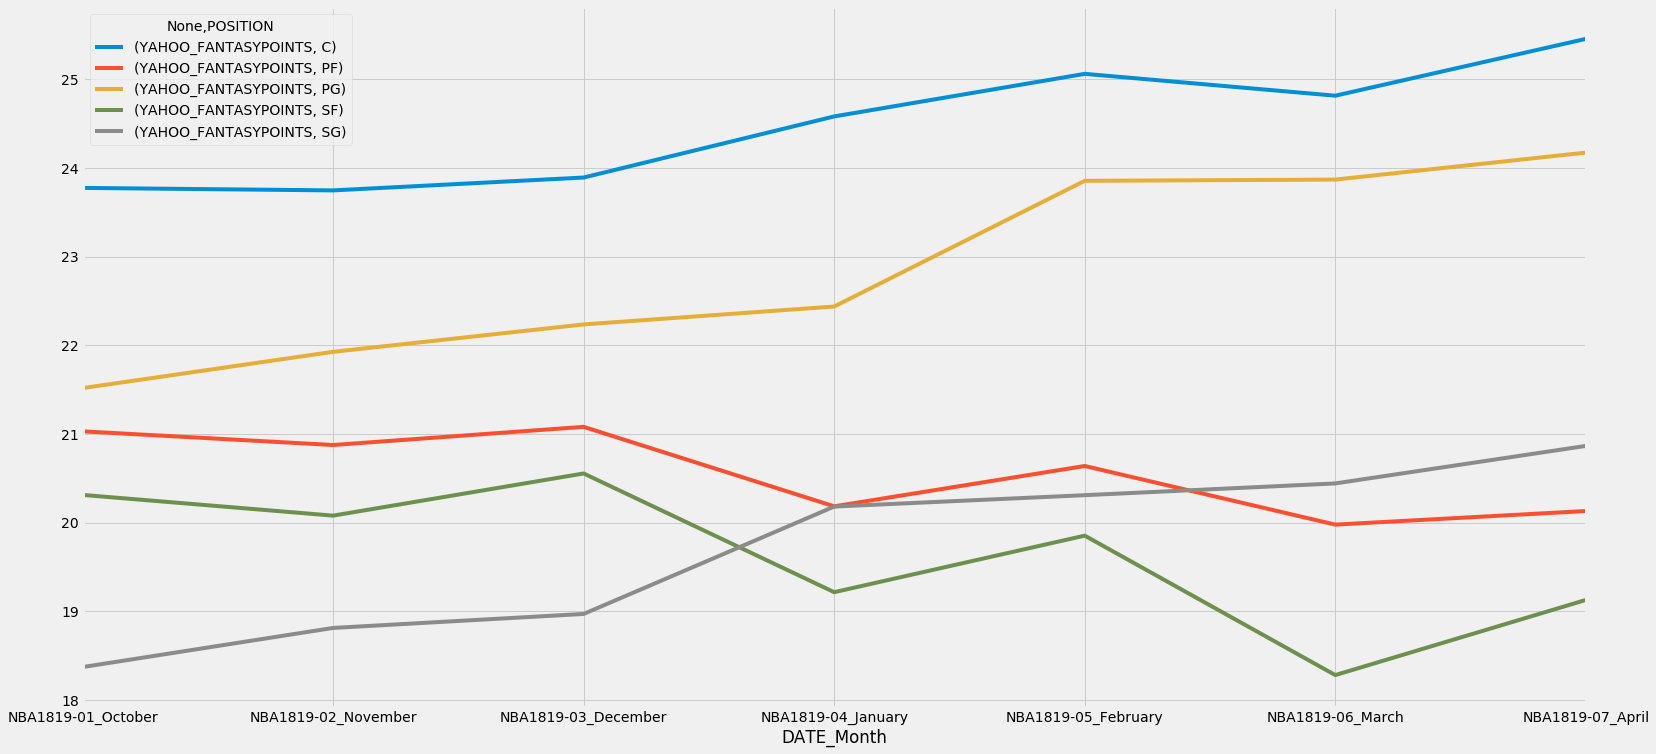

In [12]:
df[starter_mask].pivot_table(index=['DATE_Month'],
                             values=['YAHOO_FANTASYPOINTS'], 
                             columns=['POSITION'], 
                             aggfunc='mean').plot(figsize=(24, 12), kind='line')

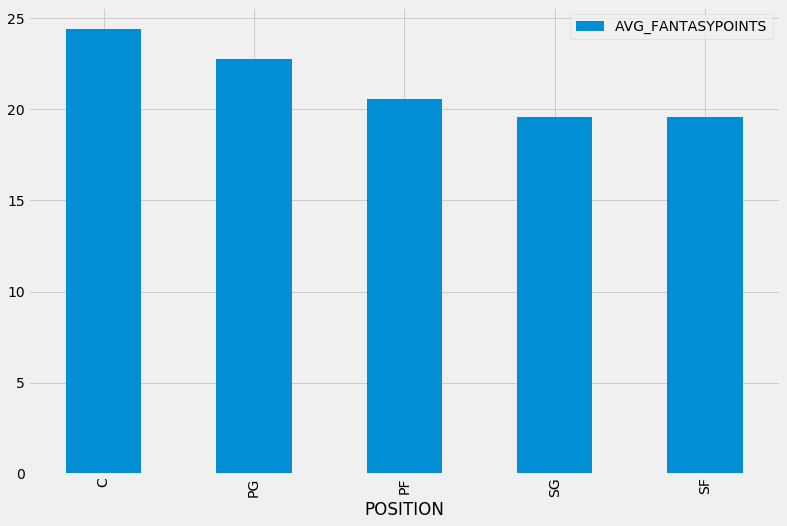

In [13]:
avg_position_value = pd.pivot_table(df[starter_mask], index=['POSITION'],
                                                      values=['YAHOO_FANTASYPOINTS'], 
                                                      aggfunc={'YAHOO_FANTASYPOINTS':'mean'}).sort_values(by='YAHOO_FANTASYPOINTS', ascending=False).reset_index()

# Rename the pivot table columns for clarity
avg_position_value.rename(columns={'YAHOO_FANTASYPOINTS':'AVG_FANTASYPOINTS'}, inplace=True)

# Create a filter for games played
avg_position_value.reset_index(drop=True).plot(x='POSITION', y='AVG_FANTASYPOINTS', kind='bar', figsize=(12,8))

In [14]:
player_trends = pd.pivot_table(df[starter_mask], index=['OWNTEAM', 'POSITION', 'PLAYER'],
                                                      values=['YAHOO_FANTASYPOINTS'],
                                                      columns=['DATE_Month'],
                                                      aggfunc='mean')

player_trends

YAHOO_FANTASYPOINTS                      \
DATE_Month                            NBA1819-01_October NBA1819-02_November   
OWNTEAM    POSITION PLAYER                                                     
Atlanta    C        Alex Len                        24.2                20.0   
                    Dewayne Dedmon                  23.5                21.3   
                    Deyonta Davis                    NaN                 NaN   
                    Isaac Humphries                  NaN                 NaN   
                    Tyler Zeller                     NaN                 NaN   
...                                                  ...                 ...   
Washington SG       Jordan McRae                     4.3                 0.0   
                    Ron Baker                        NaN                 NaN   
                    Tomas Satoransky                 NaN                 NaN   
                    Troy Brown Jr.                   7.5                 5.8   
                    Wesley Johnson                   NaN                 NaN   

                                                                             \
DATE_Month                           NBA1819-03_December NBA1819-04_January   
OWNTEAM    POSITION PLAYER                                                    
Atlanta    C        Alex Len                        17.9               25.2   
                    Dewayne Dedmon                  31.2               26.8   
                    Deyonta Davis                    NaN                NaN   
                    Isaac Humphries                  NaN                NaN   
                    Tyler Zeller                     NaN                NaN   
...                                                  ...                ...   
Washington SG       Jordan McRae                     3.1               13.4   
                    Ron Baker                        3.9                NaN   
                    Tomas Satoransky                35.3                NaN   
                    Troy Brown Jr.                   7.0                5.3   
                    Wesley Johnson                   NaN                NaN   

                                                                           \
DATE_Month                           NBA1819-05_February NBA1819-06_March   
OWNTEAM    POSITION PLAYER                                                  
Atlanta    C        Alex Len                        12.5             25.7   
                    Dewayne Dedmon                  27.9             30.9   
                    Deyonta Davis                    NaN             13.1   
                    Isaac Humphries                  NaN              NaN   
                    Tyler Zeller                     NaN              4.3   
...                                                  ...              ...   
Washington SG       Jordan McRae                    14.6              NaN   
                    Ron Baker                        NaN              NaN   
                    Tomas Satoransky                 NaN              NaN   
                    Troy Brown Jr.                   8.9             18.5   
                    Wesley Johnson                   9.4              2.9   

                                                       
DATE_Month                           NBA1819-07_April  
OWNTEAM    POSITION PLAYER                             
Atlanta    C        Alex Len                     34.6  
                    Dewayne Dedmon                NaN  
                    Deyonta Davis                13.7  
                    Isaac Humphries               7.0  
                    Tyler Zeller                  NaN  
...                                               ...  
Washington SG       Jordan McRae                  NaN  
                    Ron Baker                     NaN  
                    Tomas Satoransky              NaN  
                    Troy Brown Jr.               20.4  
  

In [17]:
top_players = pd.pivot_table(df, index=['PLAYER'],
                                 values=['YAHOO_FANTASYPOINTS', 'GAME-ID', 'PTS', 'TOT', 'A', 'ST', 'BL'], 
                                 aggfunc={'YAHOO_FANTASYPOINTS':'mean',
                                          'GAME-ID':'count',
                                          'PTS':'mean',
                                          'TOT':'mean',
                                          'A':'mean',
                                          'ST':'mean',
                                          'BL':'mean'}).sort_values(by='YAHOO_FANTASYPOINTS', ascending=False).reset_index() #.head(25)

# Rename the pivot table columns for clarity
top_players.rename(columns={'GAME-ID':'GAMES_PLAYED',
                            'YAHOO_FANTASYPOINTS':'AVG_FANTASYPOINTS'}, inplace=True)

# Reorder the column headers
top_players = top_players[['PLAYER', 'GAMES_PLAYED', 'PTS', 'TOT', 'A', 'ST', 'BL', 'AVG_FANTASYPOINTS']]
top_players

,PLAYER,GAMES_PLAYED,PTS,TOT,A,ST,BL,AVG_FANTASYPOINTS
0,James Harden,89,35.6,6.7,7.4,2.0,0.8,58.2
1,Anthony Davis,56,25.9,12.0,3.9,1.6,2.4,56.1
2,Giannis Antetokounmpo,87,27.3,12.4,5.7,1.3,1.6,55.8
3,Russell Westbrook,78,22.9,10.9,10.7,1.9,0.5,54.7
4,Joel Embiid,75,26.4,13.1,3.6,0.7,2.0,52.1
...,...,...,...,...,...,...,...,...
525,Okaro White,3,0.0,0.7,0.0,0.0,0.0,0.8
526,Tyler Ulis,1,0.0,0.0,0.0,0.0,0.0,0.0
527,Kobi Simmons,1,0.0,0.0,0.0,0.0,0.0,0.0
528,John Holland,1,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
boxscore = ['DATE', 'PLAYER', 'OPPONENTTEAM', 'MINUTES',
            'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 
            'PTS', 'TOT', 'A', 'ST', 'BL', 'TO', 'YAHOO_FANTASYPOINTS']

top_games = df[boxscore].sort_values('YAHOO_FANTASYPOINTS', ascending=False).reset_index(drop=True).head(30)
top_games

,DATE,PLAYER,OPPONENTTEAM,MINUTES,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,PTS,TOT,A,ST,BL,TO,YAHOO_FANTASYPOINTS
0,2019-01-23,James Harden,New York,40.0,17,38,0.4,5,20,0.2,22,25,0.9,61,15,4,5,0,5,95.0
1,2019-02-28,James Harden,Miami,43.9,16,32,0.5,8,18,0.4,18,18,1.0,58,7,10,4,1,4,92.4
2,2018-12-30,Karl-Anthony Towns,Miami,37.1,12,24,0.5,3,6,0.5,7,9,0.8,34,18,7,3,6,3,90.1
3,2019-02-02,James Harden,Utah,39.7,12,22,0.5,4,12,0.3,15,15,1.0,43,12,5,6,4,5,89.9
4,2019-03-17,Giannis Antetokounmpo,Philadelphia,36.2,15,26,0.6,3,8,0.4,19,21,0.9,52,16,7,2,1,1,89.7
5,2019-03-15,James Harden,Phoenix,41.7,12,25,0.5,3,11,0.3,14,17,0.8,41,9,11,6,3,6,89.3
6,2019-01-13,Bradley Beal,Toronto,54.6,17,36,0.5,6,12,0.5,3,7,0.4,43,10,15,3,2,4,88.5
7,2019-01-01,Jusuf Nurkic,Sacramento,37.5,5,10,0.5,0,0,NaN,14,16,0.9,24,23,7,5,5,4,88.1
8,2019-03-20,James Harden,Memphis,45.6,18,39,0.5,9,17,0.5,12,12,1.0,57,7,8,2,2,3,86.4
9,2018-12-28,Anthony Davis,Dallas,43.0,20,32,0.6,0,2,0.0,8,11,0.7,48,17,4,2,2,1,85.4


In [36]:
avg_50 = (top_players['AVG_FANTASYPOINTS'] > 50)
#top_players[avg_50]

In [42]:
avg_4049 = ((top_players['AVG_FANTASYPOINTS'] < 49.9) & (top_players['AVG_FANTASYPOINTS'] >= 40))
#top_players[avg_4049]

In [43]:
avg_3039 = ((top_players['AVG_FANTASYPOINTS'] < 39.9) & (top_players['AVG_FANTASYPOINTS'] >= 30))
#top_players[avg_3039]

In [44]:
avg_2029 = ((top_players['AVG_FANTASYPOINTS'] < 29.9) & (top_players['AVG_FANTASYPOINTS'] >= 20))
#top_players[avg_2029]

In [46]:
avg_1019 = ((top_players['AVG_FANTASYPOINTS'] < 19.9) & (top_players['AVG_FANTASYPOINTS'] >= 10))
#top_players[avg_1019]